In [2]:
import numpy as np

# Sample 3D array
weight = np.load('./weights/trained_lt1_lt2_weight.npy')
weight = weight.reshape((28, 28, -1))
arr = weight
# Reshape to create 2x2 blocks along the first two dimensions
new_shape = (arr.shape[0] // 2, 2, arr.shape[1] // 2, 2, arr.shape[2])
arr_reshaped = arr.reshape(new_shape)

# Calculate the mean along the newly created axes (1 and 3)
reduced_arr = arr_reshaped.mean(axis=(1, 3))

reduced_arr.shape

(14, 14, 10)

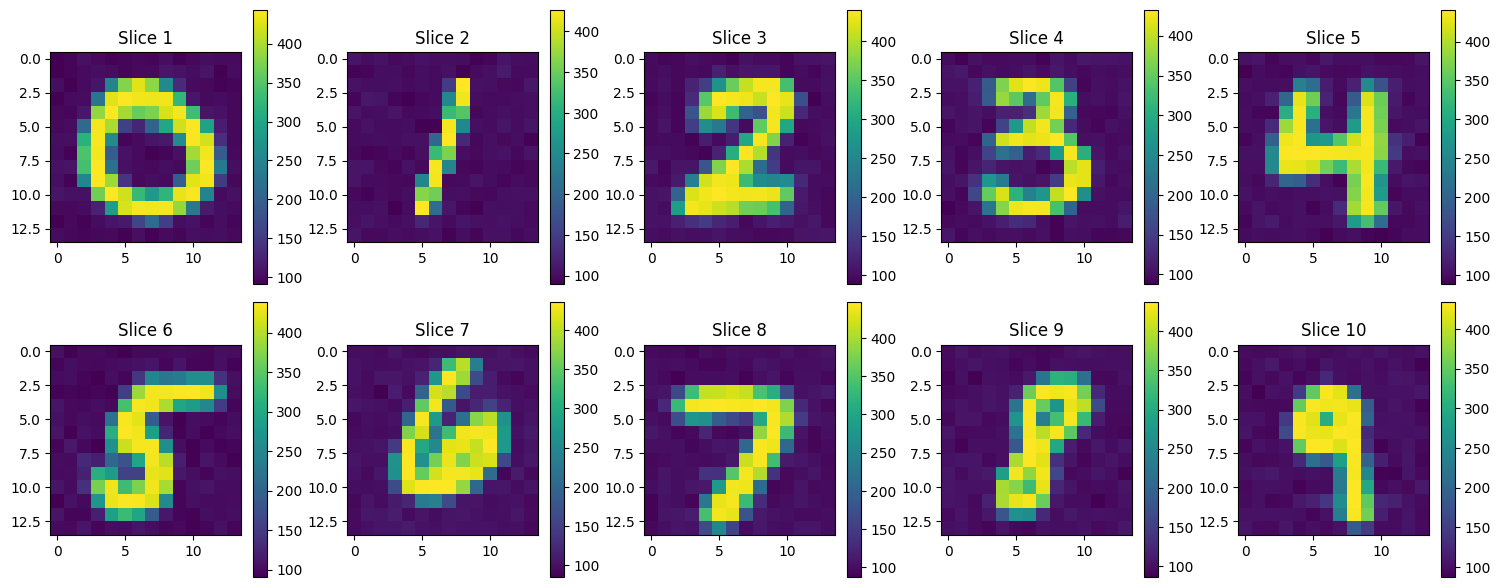

In [3]:
import matplotlib.pyplot as plt
num_plots = reduced_arr.shape[2]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each 14x14 slice
for i in range(num_plots):
    im = axes[i].imshow(reduced_arr[:, :, i])  # 'viridis' is a colormap
    axes[i].set_title(f'Slice {i+1}')

    # Add a colorbar (optional)
    plt.colorbar(im, ax=axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [8]:
reduced_arr = reduced_arr.reshape((10, -1))
np.save('./weights/trained_lt1_lt2_weight_reduced.npy', reduced_arr)